In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from surprise import Dataset, Reader
from surprise import KNNBasic, KNNWithMeans, SVD
from surprise.model_selection import cross_validate

from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.model_selection import GridSearchCV

In [95]:
#read data
ratingDf = pd.read_csv("./ratings_small.csv")
print(ratingDf)

        userId  movieId  rating   timestamp
0            1       31     2.5  1260759144
1            1     1029     3.0  1260759179
2            1     1061     3.0  1260759182
3            1     1129     2.0  1260759185
4            1     1172     4.0  1260759205
...        ...      ...     ...         ...
99999      671     6268     2.5  1065579370
100000     671     6269     4.0  1065149201
100001     671     6365     4.0  1070940363
100002     671     6385     2.5  1070979663
100003     671     6565     3.5  1074784724

[100004 rows x 4 columns]


In [96]:
# Getting rating and loading the dataset with it
rating = Reader(rating_scale=(1,5))
dataWithRating = Dataset.load_from_df(ratingDf[['userId', 'movieId', 'rating']], rating)

### Q3 - C

In [97]:
# Obtain the PFM results
algorithPfm = SVD(biased=False)

resultPfm = cross_validate(algorithPfm, dataWithRating, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0054  1.0028  1.0047  1.0122  1.0076  1.0066  0.0032  
MAE (testset)     0.7735  0.7753  0.7772  0.7797  0.7779  0.7767  0.0021  
Fit time          3.38    3.39    3.42    3.38    3.38    3.39    0.02    
Test time         0.09    0.09    0.09    0.09    0.09    0.09    0.00    


In [98]:
# Obtain the User Based results
userBasedOptionsMsd = {'name': 'MSD', 'user_based': True}

userBasedPreResult = KNNWithMeans(sim_options=userBasedOptionsMsd, verbose=False)

resultUserBased = cross_validate(userBasedPreResult, dataWithRating, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9233  0.9208  0.9178  0.9309  0.9138  0.9213  0.0057  
MAE (testset)     0.7075  0.7040  0.7013  0.7125  0.6976  0.7046  0.0051  
Fit time          0.17    0.18    0.18    0.18    0.18    0.18    0.01    
Test time         1.42    4.33    1.42    1.43    1.40    2.00    1.17    


In [99]:
# Obtain the Item Based results
itemBasedOptionsMsd = {'name': 'MSD', 'user_based': False}

itemBasedPreResult = KNNWithMeans(sim_options=itemBasedOptionsMsd, verbose=False)

resultItemBased = cross_validate(itemBasedPreResult, dataWithRating, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9148  0.9169  0.9172  0.9064  0.9126  0.9136  0.0040  
MAE (testset)     0.6977  0.7022  0.7034  0.6949  0.7002  0.6997  0.0031  
Fit time          3.30    3.37    3.38    3.38    3.29    3.34    0.04    
Test time         5.88    8.77    5.88    6.00    5.79    6.46    1.15    


### Q3 - D

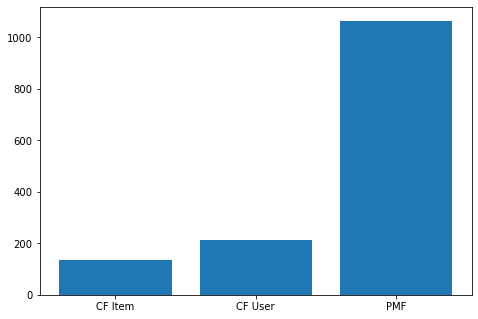

In [100]:
from statistics import mean

def getPerformanceMean(result):
    return (mean(result)-0.9)*10000

meanRmsePerformanceResult = [getPerformanceMean(resultItemBased['test_rmse']), getPerformanceMean(resultUserBased['test_rmse']), getPerformanceMean(resultPfm['test_rmse'])]

usedAlgorithms = ['CF Item', 'CF User', 'PMF']

figure = plt.figure()
axes = figure.add_axes([0,0,1,1])
axes.bar(usedAlgorithms, meanRmsePerformanceResult)
plt.show()

[-0.00032587477086409855, 0.0045797623289943745, 0.07669880400992202]


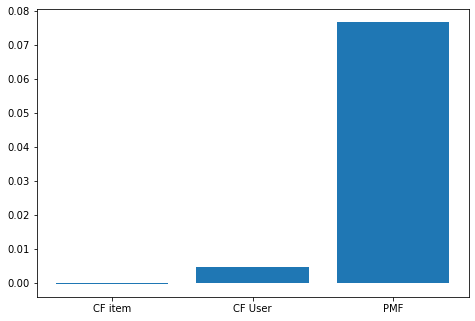

In [101]:
def getPerformance(res):
    return (mean(res)-0.7)

meanMaePerformanceResult = [getPerformance(resultItemBased['test_mae']), getPerformance(resultUserBased['test_mae']), getPerformance(resultPfm['test_mae'])]

print(meanMaePerformanceResult)

usedAlgorithms = ['CF item', 'CF User', 'PMF']

figure = plt.figure()
axes = figure.add_axes([0,0,1,1])
axes.bar(usedAlgorithms, meanMaePerformanceResult)
plt.show()

### Q3 - E

In [102]:
# Obtain User Based Cosine Result
userBasedOptions = {'name': 'cosine', 'user_based': True}

userBased = KNNWithMeans(sim_options=userBasedOptions, verbose=False)

cosineUserBasedResults = cross_validate(userBased, dataWithRating, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9218  0.9135  0.9290  0.9236  0.9188  0.9213  0.0052  
MAE (testset)     0.7047  0.7027  0.7129  0.7079  0.7027  0.7062  0.0039  
Fit time          0.46    0.48    0.48    0.48    0.48    0.48    0.01    
Test time         1.43    4.25    1.43    1.44    1.41    1.99    1.13    


In [103]:
# Obtain Item Based Cosine Result
itemBasedOptions = {'name': 'cosine', 'user_based': False}

itemBased = KNNWithMeans(sim_options=userBasedOptions, verbose=False)

cosineItemBasedResults = cross_validate(itemBased, dataWithRating, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9237  0.9210  0.9215  0.9208  0.9216  0.9217  0.0010  
MAE (testset)     0.7068  0.7064  0.7057  0.7062  0.7072  0.7065  0.0005  
Fit time          0.46    0.51    0.49    0.52    0.48    0.49    0.02    
Test time         1.50    4.42    1.47    1.41    1.44    2.05    1.19    


In [104]:
# Obtain Pearson Result
pearsonOptions = {'name': 'pearson_baseline', 'user_based': True}

pearson = KNNWithMeans(sim_options=pearsonOptions, verbose=False)

pearsonResults = cross_validate(pearson, dataWithRating, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9236  0.9256  0.9238  0.9205  0.9195  0.9226  0.0023  
MAE (testset)     0.7009  0.7055  0.7021  0.6988  0.6991  0.7013  0.0024  
Fit time          0.68    0.70    0.69    0.70    0.70    0.69    0.01    
Test time         1.29    4.21    1.29    1.28    1.30    1.87    1.17    


[213.42180366765385, 217.19847349323308, 226.0160585751525]


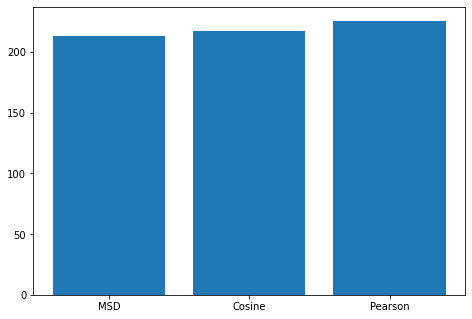

In [113]:
#RMSE comparison
performanceMean = [getPerformanceMean(cosineUserBasedResults['test_rmse']), getPerformanceMean(cosineItemBasedResults['test_rmse']), getPerformanceMean(pearsonResults['test_rmse'])]

print(performanceMean)

usedAlgorithms = ['MSD', 'Cosine', 'Pearson']

figure = plt.figure()
axes = figure.add_axes([0,0,1,1])
axes.bar(usedAlgorithms, performanceMean)
plt.show()

[0.006192458787064203, 0.006451845286075675, 0.0012690582691418095]


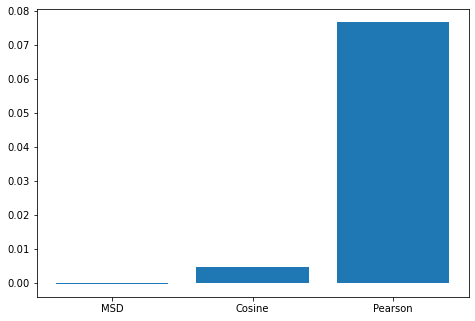

In [106]:
#MAE
performanceMean = [getPerformance(cosineUserBasedResults['test_mae']), getPerformance(cosineItemBasedResults['test_mae']), getPerformance(pearsonResults['test_mae'])]

print(performanceMean)

usedAlgorithms = ['MSD', 'Cosine', 'Pearson']

figure = plt.figure()
axes = figure.add_axes([0,0,1,1])
axes.bar(usedAlgorithms, meanMaePerformanceResult)
plt.show()

### Q3 - F

K :  5
RMSE: 0.9537
K :  10
RMSE: 0.9289
K :  15
RMSE: 0.9215
K :  20
RMSE: 0.9187
K :  25
RMSE: 0.9173
K :  30
RMSE: 0.9167
K :  35
RMSE: 0.9164
K :  40
RMSE: 0.9163
K :  45
RMSE: 0.9161
K :  50
RMSE: 0.9162
K :  55
RMSE: 0.9163
K :  60
RMSE: 0.9162
K :  65
RMSE: 0.9164
K :  70
RMSE: 0.9165
K :  75
RMSE: 0.9165
K :  80
RMSE: 0.9167
K :  85
RMSE: 0.9168
K :  90
RMSE: 0.9169
K :  95
RMSE: 0.9170
K :  100
RMSE: 0.9171
K :  105
RMSE: 0.9171
K :  110
RMSE: 0.9172
K :  115
RMSE: 0.9172
K :  120
RMSE: 0.9173
K :  125
RMSE: 0.9173
K :  130
RMSE: 0.9174
K :  135
RMSE: 0.9174
K :  140
RMSE: 0.9174
K :  145
RMSE: 0.9175
K :  150
RMSE: 0.9175


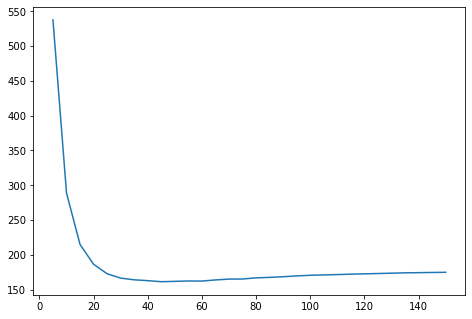

In [107]:
train, test = train_test_split(dataWithRating, test_size=.25)

resultsBykUser = []
k = [x*5 for x in range(1, 31)]

for kInput in k:
    print("K : ", kInput)
    algorithmResult = KNNWithMeans(k=kInput, sim_options=userBasedOptionsMsd, verbose=False)
    
    algorithmResult.fit(train)
    predictions = algorithmResult.test(test)
    
    resultsBykUser.append((accuracy.rmse(predictions)-0.9)*10000)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(k,resultsBykUser)
plt.show()

K :  5
RMSE: 0.9785
K :  10
RMSE: 0.9456
K :  15
RMSE: 0.9341
K :  20
RMSE: 0.9263
K :  25
RMSE: 0.9225
K :  30
RMSE: 0.9197
K :  35
RMSE: 0.9179
K :  40
RMSE: 0.9167
K :  45
RMSE: 0.9156
K :  50
RMSE: 0.9147
K :  55
RMSE: 0.9143
K :  60
RMSE: 0.9138
K :  65
RMSE: 0.9136
K :  70
RMSE: 0.9134
K :  75
RMSE: 0.9131
K :  80
RMSE: 0.9129
K :  85
RMSE: 0.9129
K :  90
RMSE: 0.9128
K :  95
RMSE: 0.9126
K :  100
RMSE: 0.9126
K :  105
RMSE: 0.9125
K :  110
RMSE: 0.9125
K :  115
RMSE: 0.9124
K :  120
RMSE: 0.9123
K :  125
RMSE: 0.9122
K :  130
RMSE: 0.9121
K :  135
RMSE: 0.9121
K :  140
RMSE: 0.9121
K :  145
RMSE: 0.9121
K :  150
RMSE: 0.9121


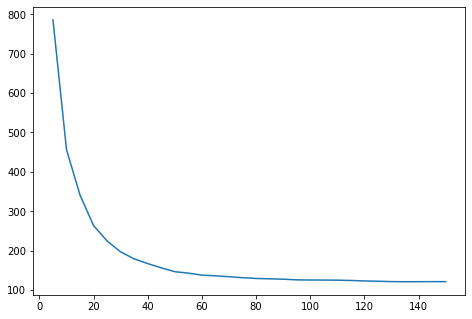

In [109]:
trainset, testset = train_test_split(dataWithRating, test_size=.25)

kItemResults = []
k = [x*5 for x in range(1, 31)]

for kInput in k:
    print("K : ", kInput)
    
    algorithmResult = KNNWithMeans(k=kInput, sim_options=itemBasedOptionsMsd, verbose=False)
    algorithmResult.fit(trainset)
    predictions = algorithmResult.test(testset)
    
    kItemResults.append((accuracy.rmse(predictions)-0.9)*10000)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(k, kItemResults)
plt.show()

### Q3 - G

In [111]:
# obtain best performance User Based

k = [x*5 for x in range(1, 31)]

userGridParameters = {'k': k,
              'sim_options': {'user_based': [True]},
              'verbose' : [False]
              }

userGS = GridSearchCV(KNNWithMeans, userGridParameters, measures=['rmse'], cv=3)

userGS.fit(dataWithRating)

print(userGS.best_score['rmse'])
print(userGS.best_params['rmse'])

0.9267405460539431
{'k': 50, 'sim_options': {'user_based': True}, 'verbose': False}


In [112]:
# obtain best performance Item Based
k = [x*5 for x in range(1, 31)]
itemGridParameters = {'k': k,
              'sim_options': {'user_based': [False]},
              'verbose' : [False]
              }

itemGS = GridSearchCV(KNNWithMeans, itemGridParameters, measures=['rmse', 'mae'], cv=3)

itemGS.fit(dataWithRating)

print(itemGS.best_score['rmse'])
print(itemGS.best_params['rmse'])

0.9188590401150057
{'k': 140, 'sim_options': {'user_based': False}, 'verbose': False}
